## 0.4　初めての実習

### ライブラリ・コマンドの準備

In [1]:
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
w = !apt install tree
print(w[-2])

tree is already the newest version (2.0.2-1).


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

### 初期設定

In [4]:
plt.rcParams['font.size'] = 14

import warnings
warnings.simplefilter('ignore')

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [6]:
!git clone http://github.com/makaishi2/pythonlibs.git

from pythonlibs.torch_lib1 import *

print(README)

fatal: destination path 'pythonlibs' already exists and is not an empty directory.
Common Library for PyTorch
Author: M. Akaishi


### 学習データの読み込み

In [7]:
# w = !wget http://github.com/makaishi2/pythonlibs/raw/main/images/dog_wolf.zip
# print(w[-2])

# w = !unzip dog_wolf.zip
# print(w[-1])
data_dir = 'dog_wolf'

import os
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

classes = ['dog', 'wolf']

!tree dog_wolf

dog_wolf
├── test
│   ├── dog
│   │   ├── dog-21.png
│   │   ├── dog-22.png
│   │   ├── dog-23.png
│   │   ├── dog-24.png
│   │   └── dog-25.png
│   └── wolf
│       ├── wolf-21.png
│       ├── wolf-22.png
│       ├── wolf-23.png
│       ├── wolf-24.png
│       └── wolf-25.png
└── train
    ├── dog
    │   ├── dog-01.png
    │   ├── dog-02.png
    │   ├── dog-03.png
    │   ├── dog-04.png
    │   ├── dog-05.png
    │   ├── dog-06.png
    │   ├── dog-07.png
    │   ├── dog-08.png
    │   ├── dog-09.png
    │   ├── dog-10.png
    │   ├── dog-11.png
    │   ├── dog-12.png
    │   ├── dog-13.png
    │   ├── dog-14.png
    │   ├── dog-15.png
    │   ├── dog-16.png
    │   ├── dog-17.png
    │   ├── dog-18.png
    │   ├── dog-19.png
    │   └── dog-20.png
    └── wolf
        ├── wolf-01.png
        ├── wolf-02.png
        ├── wolf-03.png
        ├── wolf-04.png
        ├── wolf-05.png
        ├── wolf-06.png
        ├── wolf-07.png
        ├── wolf-08.png
        ├── wolf-09.png
        ├──

In [8]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
])

In [9]:
train_data = datasets.ImageFolder(train_dir, transform=train_transform)
train_data2 = datasets.ImageFolder(train_dir, transform=test_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

In [10]:
batch_size = 5
train_loader = DataLoader(train_data, batch_size=5, shuffle=True)
train_loader2 = DataLoader(train_data2, batch_size=40, shuffle=False)
test_loader = DataLoader(test_data, batch_size=5, shuffle=False)
test_loader2 = DataLoader(test_data, batch_size=10, shuffle=True)

### 学習データのイメージ表示

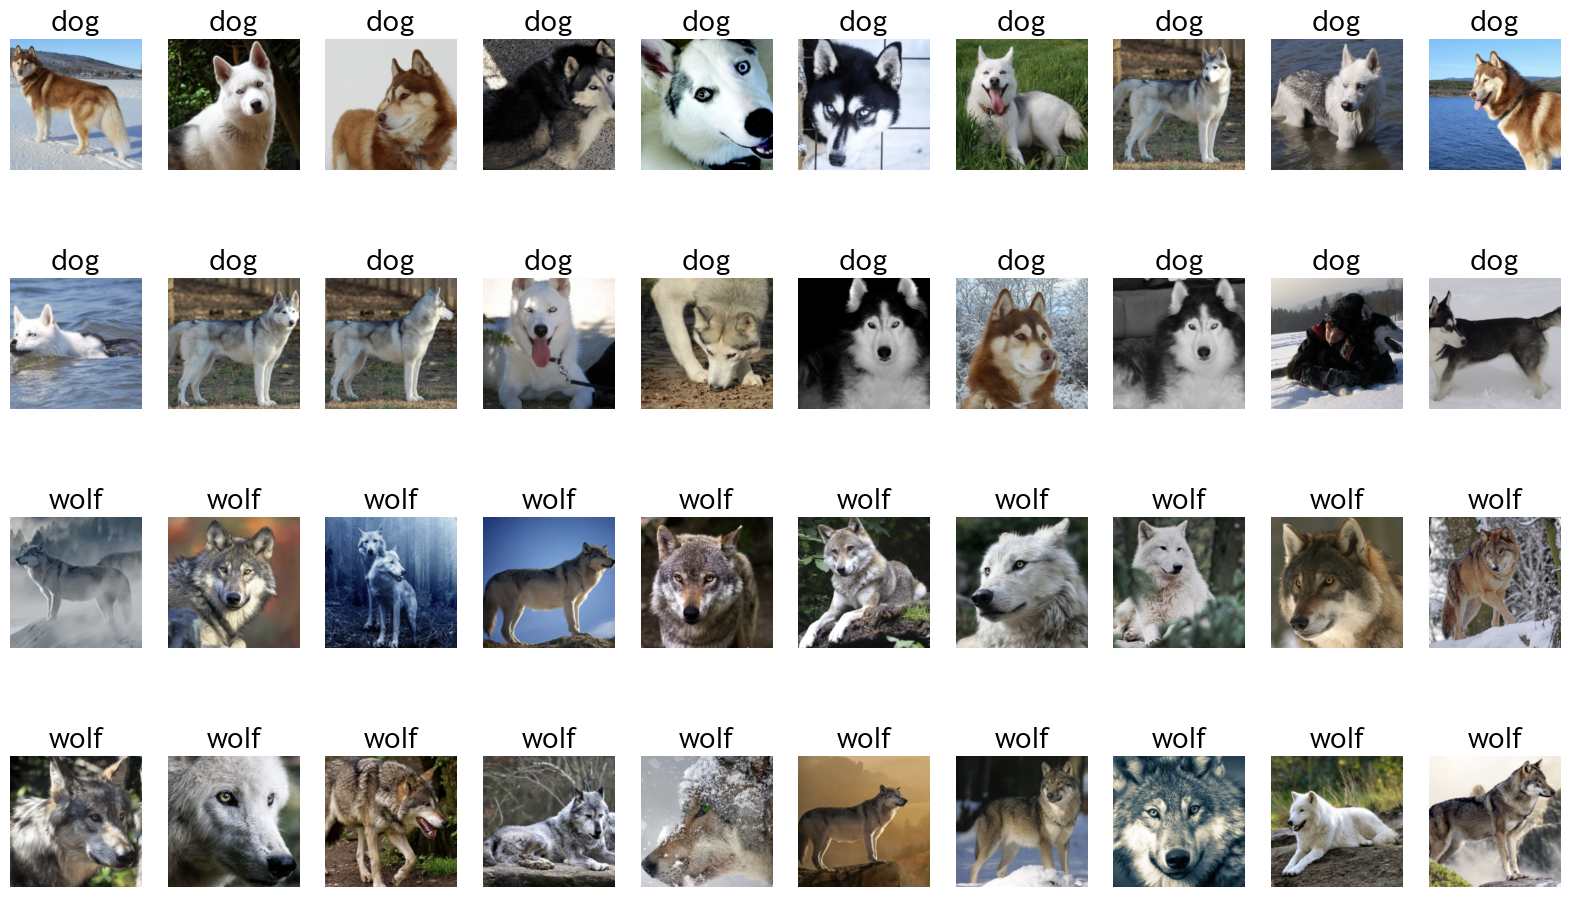

In [11]:
show_images_labels(train_loader2, classes, None, None)

### 検証データのイメージ表示

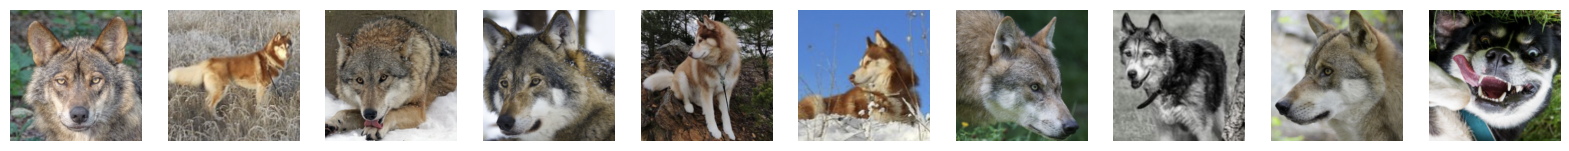

In [12]:
torch_seed()
show_images_labels(test_loader2, ['', ''], None, None)

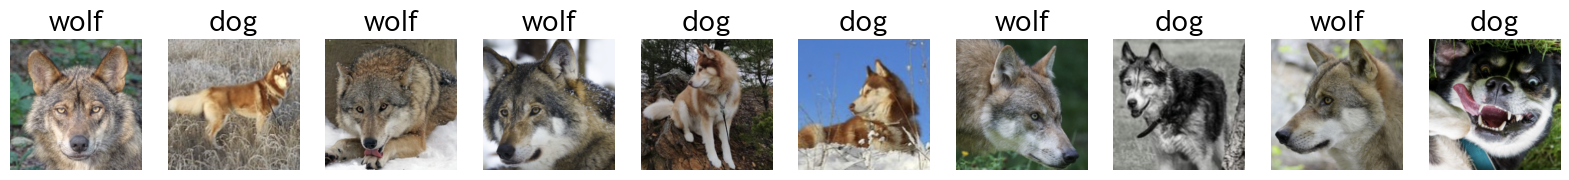

In [13]:
torch_seed()
show_images_labels(test_loader2, classes, None, None)

### モデル構築

In [14]:
from torchvision import models
net = models.vgg19_bn(pretrained=True)

for param in net.parameters():
  param.requires_grad = False

torch_seed()

in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, 2)

net.avgpool = nn.Identity()

net = net.to(device)

lr = 0.001

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.classifier[6].parameters(), lr=lr, momentum=0.9)

history = np.zeros((0, 5))

### 学習

In [15]:
num_epochs = 10

history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [1/10], loss: 0.61454 acc: 0.75000 val_loss: 0.38611, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [2/10], loss: 0.28818 acc: 0.90000 val_loss: 0.28590, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.21766 acc: 0.90000 val_loss: 0.16600, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.10558 acc: 0.95000 val_loss: 0.18823, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.08623 acc: 0.97500 val_loss: 0.16863, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.14394 acc: 0.97500 val_loss: 0.15020, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.06082 acc: 1.00000 val_loss: 0.13804, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.10731 acc: 0.97500 val_loss: 0.18357, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.04853 acc: 1.00000 val_loss: 0.23736, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.05934 acc: 1.00000 val_loss: 0.26162, val_acc: 0.80000


### 結果確認

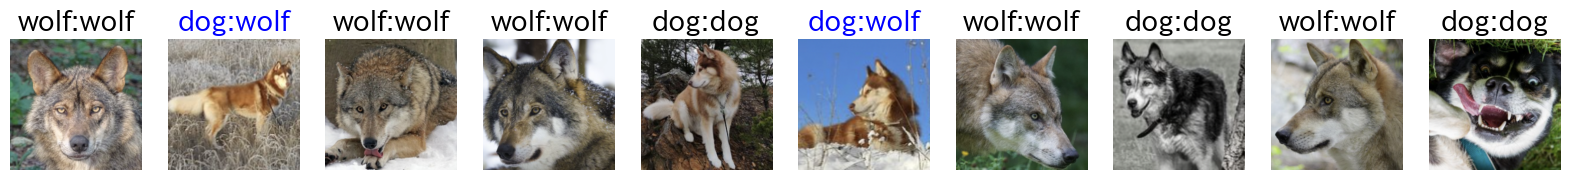

In [16]:
torch_seed()
show_images_labels(test_loader2, classes, net, device)